In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c license-plate-recognition

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           6989        128  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56             95        343  1.0              
rashadrmammadov/heart-disease-prediction                             Heart Disease prediction                          16KB  2024-06-12 07:29:56            751         22  1.0              
monisamir/global-salary-analysis                  

In [2]:
!unzip /content/license-plate-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: 1-LPR-950/1-LPR-950/1/License_00647.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00648.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00649.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00650.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00651.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00652.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00653.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00654.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00655.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00656.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00657.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00658.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00659.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00660.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00661.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00662.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00663.jpg  
  inflating: 1

<hr>

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
test_df = pd.read_csv("/content/test.csv")
test_df

image_id          x1          y1  \
0     4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4  333.014354  205.741627   
1     2678e665-50a9-42eb-8b98-3a1323a8950d  293.574297  201.867470   
2     1b3bee82-898d-4aa8-9a7e-6f375ad62d8f  306.425703  204.277108   
3     6d997bce-395e-4d25-85e4-dec70ead7954  332.530120  199.056225   
4     59c765b1-cdac-4fa7-902c-685f1591decf  312.466844  160.477454   
...                                    ...         ...         ...   
1695  1c766e55-3096-4814-8c23-7cb8facc0e36  326.506024  205.481928   
1696  98e8495a-e51d-494f-951d-739a93d87777  311.962963  201.308642   
1697  935248b8-1fe9-4cc3-8894-007bd715d309  305.790123  204.395062   
1698  df48b54b-8e63-4484-85f1-99a6c97e92f4  328.012346  215.506173   
1699  0935be77-b0e7-4c90-8a42-9b03d3ad0a66  324.096386  209.497992   

              x2          y2  
0     394.497608  238.277512  
1     358.634538  235.200803  
2     362.248996  227.168675  
3     397.991968  228.775100  
4     378.779841  193.103448  
...          ...         ...  
1695  380.321285  237.208835  
1696  374.308642  232.790123  
1697  371.839506  236.493827  
1698  389.740741  247.604938  
1699  385.542169  238.012048  

[1700 rows x 5 columns]

In [5]:
submit_df = pd.read_csv("/content/submission.csv")
submit_df

image_id     label
0     4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4   0‡∏¨-0674
1     2678e665-50a9-42eb-8b98-3a1323a8950d  05‡∏Å‡∏í4901
2     1b3bee82-898d-4aa8-9a7e-6f375ad62d8f   1‡∏Å‡∏â9661
3     6d997bce-395e-4d25-85e4-dec70ead7954       NaN
4     59c765b1-cdac-4fa7-902c-685f1591decf       NaN
...                                    ...       ...
1695  1c766e55-3096-4814-8c23-7cb8facc0e36       NaN
1696  98e8495a-e51d-494f-951d-739a93d87777       NaN
1697  935248b8-1fe9-4cc3-8894-007bd715d309       NaN
1698  df48b54b-8e63-4484-85f1-99a6c97e92f4       NaN
1699  0935be77-b0e7-4c90-8a42-9b03d3ad0a66       NaN

[1700 rows x 2 columns]

In [6]:
len(os.listdir("/content/test/test"))

1700

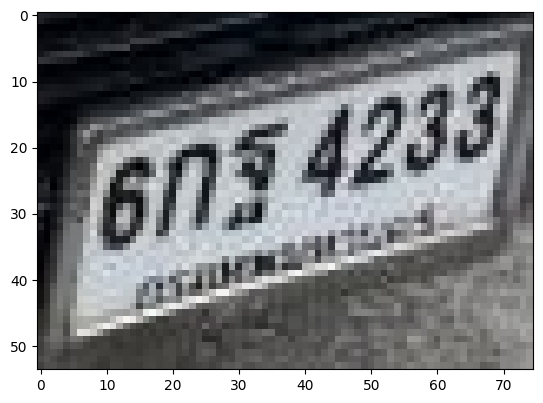

In [7]:
img = plt.imread("/content/1-LPR-950/1-LPR-950/1/License_00002.jpg")
plt.imshow(img)

In [8]:
def txtread(txtpath):
    with open(txtpath) as f:
        lines = f.readlines()
    print(lines)

In [9]:
with open("/content/1-LPR-950/1-LPR-950/1/labels/License_00002.txt") as f:
    lines = f.readlines()
lines

['6 0.16 0.546292 0.133336 0.425925\n',
 '4 0.56 0.39815 0.16 0.35185\n',
 '2 0.666672 0.314817 0.106664 0.370367\n',
 '3 0.773336 0.305558 0.106664 0.314817\n',
 '3 0.873336 0.277775 0.12 0.333333\n',
 '10 0.28 0.490742 0.106664 0.388892\n',
 '25 0.433336 0.4537 0.146664 0.35185\n',
 '54 0.52 0.638892 0.693336 0.240742\n']

In [10]:
def image_w_box(pm1:str,pm2:str):
    """
    pm1 : image path str
    pm2 : yolo labels path str
    """
    # Load the image
    img = plt.imread(pm1)
    print(img.shape)
    # Path to the annotation file
    annotation_img = pm2
    # Read the YOLO annotations from the file
    with open(annotation_img, 'r') as file:
        yolo_annotations = file.readlines()
    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(img)
    # Function to convert YOLO format to bounding box coordinates
    def yolo_to_bbox(yolo_annotation, img_width, img_height):
        class_label, x_center, y_center, width, height = map(float, yolo_annotation.split())
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        return x_min, y_min, width, height, int(class_label)
    # Get image dimensions
    img_height, img_width = img.shape[:2]

    # Plot each bounding box and label
    for annotation in yolo_annotations:
        x_min, y_min, width, height, class_label = yolo_to_bbox(annotation, img_width, img_height)
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min-5, y_min - 5, str(class_label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

## ‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞label ‡∏à‡∏≤‡∏Å 1-LPR-950

In [11]:
img_path_name = f'/content/1-LPR-950/1-LPR-950/1/License_00003.jpg'
ano_path_name = "/content/1-LPR-950/1-LPR-950/1/labels/License_00003.txt"

image_w_box(img_path_name,ano_path_name)

(51, 142, 3)


In [13]:
with open(ano_path_name, 'r') as file:
    yolo_annotations = file.readlines()
yolo_annotations

['117 0.521123 0.843133 0.323945 0.431366\n',
 '10 0.211265 0.460788 0.154931 0.568622\n',
 '42 0.34507 0.450981 0.154931 0.549023\n',
 '2 0.552813 0.431366 0.147887 0.549023\n',
 '8 0.669011 0.431366 0.112677 0.509809\n',
 '3 0.774644 0.421574 0.112677 0.568622\n',
 '9 0.901405 0.392152 0.154931 0.588236\n']

## ‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞label ‡∏à‡∏≤‡∏Å 2-LPR-950

(56, 107, 3)


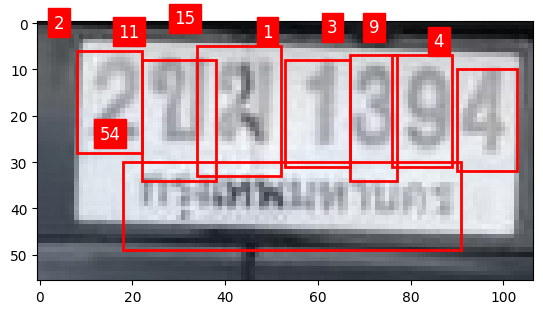

In [14]:
img_path_name = f'/content/2-LRP-950/2-LRP-950/2/License_00951.jpg'
ano_path_name = "/content/2-LRP-950/2-LRP-950/2/labels/License_00951.txt"

image_w_box(img_path_name,ano_path_name)

In [15]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
ipdict = {}
for idx,i in enumerate(ipclass):
    ipdict[idx] = i

In [16]:
ipdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '‡∏Å',
 11: '‡∏Ç',
 12: '‡∏É',
 13: '‡∏Ñ',
 14: '‡∏Ö',
 15: '‡∏Ü',
 16: '‡∏á',
 17: '‡∏à',
 18: '‡∏â',
 19: '‡∏ä',
 20: '‡∏ã',
 21: '‡∏å',
 22: '‡∏ç',
 23: '‡∏é',
 24: '‡∏è',
 25: '‡∏ê',
 26: '‡∏ë',
 27: '‡∏í',
 28: '‡∏ì',
 29: '‡∏î',
 30: '‡∏ï',
 31: '‡∏ñ',
 32: '‡∏ó',
 33: '‡∏ò',
 34: '‡∏ô',
 35: '‡∏ö',
 36: '‡∏õ',
 37: '‡∏ú',
 38: '‡∏ù',
 39: '‡∏û',
 40: '‡∏ü',
 41: '‡∏†',
 42: '‡∏°',
 43: '‡∏¢',
 44: '‡∏£',
 45: '‡∏•',
 46: '‡∏ß',
 47: '‡∏®',
 48: '‡∏©',
 49: '‡∏™',
 50: '‡∏´',
 51: '‡∏¨',
 52: '‡∏≠',
 53: '‡∏Æ',
 54: '‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£',
 55: '‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà',
 56: '‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ',
 57: '‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå',
 58: '‡∏Å‡∏≥‡πÅ‡∏û‡∏á‡πÄ‡∏û‡∏ä‡∏£',
 59: '‡∏Ç‡∏≠‡∏ô‡πÅ‡∏Å‡πà‡∏ô',
 60: '‡∏à‡∏±‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ',
 61: '‡∏â‡∏∞‡πÄ‡∏ä‡∏¥‡∏á‡πÄ‡∏ó‡∏£‡∏≤',
 62: '‡∏ä‡∏•‡∏ö‡∏∏‡∏£‡∏µ',
 63: '‡∏ä‡∏±‡∏¢‡∏ô‡∏≤‡∏ó',
 64: '‡∏ä‡∏±‡∏¢‡∏†‡∏π‡∏°‡∏¥',
 65: '‡∏ä‡∏∏‡

# test data

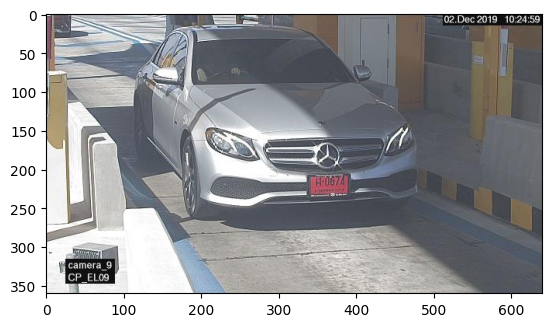

In [17]:
img = plt.imread("/content/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg")
plt.imshow(img)

In [18]:
test_df.iloc[0].values[0]

'4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4'

In [19]:
img_name = test_df.iloc[0].values[0]
x1 = int(test_df.iloc[0].values[1])
y1 = int(test_df.iloc[0].values[2])
x2 = int(test_df.iloc[0].values[3])
y2 = int(test_df.iloc[0].values[4])
print(f"{img_name} {x1} {y1} {x2} {y2}")

4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4 333 205 394 238


In [20]:
# /content/test/test/0008f18b-bbde-4cc5-92a3-b8a340484eab.jpg
# "/content/test/test/"+img_name+'.jpg'
img = plt.imread("/content/test/test/"+img_name+'.jpg')
plt.imshow(img[y1:y2,x1:x2])


<hr>

In [21]:
import os

# Define the folder structure
folder_structure = {
    "YOLOData": {
        "simages": {
            "images": {},
            "labels": {}
        },
        "result": {},
        "train": {
            "images": {},
            "labels": {},
        },
        "val": {
            "images": {},
            "labels": {},
        },
    }
}

def create_folders(base_path, structure):
    for name, substructure in structure.items():
        folder_path = os.path.join(base_path, name)
        if substructure is None:
            # If substructure is None, create a file
            open(folder_path, 'a').close()
        else:
            # Otherwise, create a directory and recurse
            os.makedirs(folder_path, exist_ok=True)
            create_folders(folder_path, substructure)

# Create the folder structure in Colab
base_path = "/content"
create_folders(base_path, folder_structure)

print("Folder structure created successfully!")

Folder structure created successfully!


In [22]:
import shutil

In [23]:
# copy label file -> simages
labelpath1 = "/content/1-LPR-950/1-LPR-950/1/labels"
for i in os.listdir(labelpath1):
    labelname = labelpath1+'/'+i
    print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break
labelpath2 = "/content/2-LRP-950/2-LRP-950/2/labels"
for i in os.listdir(labelpath2):
    labelname = labelpath2+'/'+i
    print(labelname)
    shutil.copy(labelname,"/content/YOLOData/simages/labels")
    # break

/content/1-LPR-950/1-LPR-950/1/labels/License_00452.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00437.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00349.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00776.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00116.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00003.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00071.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00016.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00552.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00124.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00853.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00807.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00194.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00875.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00120.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00793.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00797.txt
/content/1-LPR-950/1-LPR-950/1/labels/License_00

In [24]:
imgpath1 = "/content/1-LPR-950/1-LPR-950/1"
for i in os.listdir(imgpath1):
    imgname = imgpath1 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath1+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break
imgpath2 = "/content/2-LRP-950/2-LRP-950/2"
for i in os.listdir(imgpath2):
    imgname = imgpath2 + '/' + i
    if os.path.isdir(imgname): # if is dir
        continue
    else:
        # print(imgpath2+'/'+i)
        shutil.copy(imgname,"/content/YOLOData/simages/images")
    # break

<hr>

In [25]:
imgpd = os.listdir("/content/YOLOData/simages/images")
imgpd

['License_00222.jpg',
 'License_00905.jpg',
 'License_01660.jpg',
 'License_00278.jpg',
 'License_00816.jpg',
 'License_00311.jpg',
 'License_00402.jpg',
 'License_00766.jpg',
 'License_00761.jpg',
 'License_00616.jpg',
 'License_01663.jpg',
 'License_01445.jpg',
 'License_00387.jpg',
 'License_01592.jpg',
 'License_00428.jpg',
 'License_01213.jpg',
 'License_00867.jpg',
 'License_00654.jpg',
 'License_00728.jpg',
 'License_01719.jpg',
 'License_00221.jpg',
 'License_01759.jpg',
 'License_00256.jpg',
 'License_00289.jpg',
 'License_00655.jpg',
 'License_00090.jpg',
 'License_00298.jpg',
 'License_00158.jpg',
 'License_00581.jpg',
 'License_00522.jpg',
 'License_01627.jpg',
 'License_00192.jpg',
 'License_01414.jpg',
 'License_01349.jpg',
 'License_01144.jpg',
 'License_01221.jpg',
 'License_00988.jpg',
 'License_00694.jpg',
 'License_01482.jpg',
 'License_01824.jpg',
 'License_01650.jpg',
 'License_00698.jpg',
 'License_00363.jpg',
 'License_00059.jpg',
 'License_01147.jpg',
 'License_

In [26]:
df = pd.DataFrame(imgpd, columns=['column_name'])
df

column_name
0     License_00222.jpg
1     License_00905.jpg
2     License_01660.jpg
3     License_00278.jpg
4     License_00816.jpg
...                 ...
1966  License_01550.jpg
1967  License_01795.jpg
1968  License_00407.jpg
1969  License_00685.jpg
1970  License_00527.jpg

[1971 rows x 1 columns]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the DataFrame into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)


# Print the sizes of the split datasets
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")

Training set size: 1773
Validation set size: 198


In [29]:
# /content/YOLOData/simages/images/License_00001.jpg
# /content/YOLOData/simages/labels/License_00001.txt
for i in list(train_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/train/images")
        shutil.copy(nonpath,"/content/YOLOData/train/labels")
    except:
        continue
    # break

for i in list(val_df['column_name']):
    idname = i.split(".")[0]
    imgpath = "/content/YOLOData/simages/images/"+idname+'.jpg'
    nonpath = "/content/YOLOData/simages/labels/"+idname+'.txt'
    print(imgpath,nonpath)
    try:
        shutil.copy(imgpath,"/content/YOLOData/val/images")
        shutil.copy(nonpath,"/content/YOLOData/val/labels")
    except:
        continue
    # break

/content/YOLOData/simages/images/License_00214.jpg /content/YOLOData/simages/labels/License_00214.txt
/content/YOLOData/simages/images/License_01014.jpg /content/YOLOData/simages/labels/License_01014.txt
/content/YOLOData/simages/images/License_00563.jpg /content/YOLOData/simages/labels/License_00563.txt
/content/YOLOData/simages/images/License_00018.jpg /content/YOLOData/simages/labels/License_00018.txt
/content/YOLOData/simages/images/License_00910.jpg /content/YOLOData/simages/labels/License_00910.txt
/content/YOLOData/simages/images/License_01199.jpg /content/YOLOData/simages/labels/License_01199.txt
/content/YOLOData/simages/images/License_00401.jpg /content/YOLOData/simages/labels/License_00401.txt
/content/YOLOData/simages/images/License_01602.jpg /content/YOLOData/simages/labels/License_01602.txt
/content/YOLOData/simages/images/License_01576.jpg /content/YOLOData/simages/labels/License_01576.txt
/content/YOLOData/simages/images/License_01082.jpg /content/YOLOData/simages/label

In [30]:
print(len(os.listdir("/content/YOLOData/train/images")))
print(len(os.listdir("/content/YOLOData/train/labels")))

1773
1754


In [31]:
print(len(os.listdir("/content/YOLOData/val/images")))
print(len(os.listdir("/content/YOLOData/val/labels")))

198
197


<hr>

# YOLO

In [32]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [33]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 21.3/21.3 MB 65.3 MB/s eta 0:00:00


In [ ]:
!mkdir -p {HOME}/weights
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

In [34]:
with open("/content/lp_classes.txt") as f:
    lines = f.readlines()
ipclass = [i.replace("\n","") for i in lines]
# ipdict = {}
# for idx,i in enumerate(ipclass):
#     ipdict[idx] = i
ipclass

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '‡∏Å',
 '‡∏Ç',
 '‡∏É',
 '‡∏Ñ',
 '‡∏Ö',
 '‡∏Ü',
 '‡∏á',
 '‡∏à',
 '‡∏â',
 '‡∏ä',
 '‡∏ã',
 '‡∏å',
 '‡∏ç',
 '‡∏é',
 '‡∏è',
 '‡∏ê',
 '‡∏ë',
 '‡∏í',
 '‡∏ì',
 '‡∏î',
 '‡∏ï',
 '‡∏ñ',
 '‡∏ó',
 '‡∏ò',
 '‡∏ô',
 '‡∏ö',
 '‡∏õ',
 '‡∏ú',
 '‡∏ù',
 '‡∏û',
 '‡∏ü',
 '‡∏†',
 '‡∏°',
 '‡∏¢',
 '‡∏£',
 '‡∏•',
 '‡∏ß',
 '‡∏®',
 '‡∏©',
 '‡∏™',
 '‡∏´',
 '‡∏¨',
 '‡∏≠',
 '‡∏Æ',
 '‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£',
 '‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà',
 '‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ',
 '‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå',
 '‡∏Å‡∏≥‡πÅ‡∏û‡∏á‡πÄ‡∏û‡∏ä‡∏£',
 '‡∏Ç‡∏≠‡∏ô‡πÅ‡∏Å‡πà‡∏ô',
 '‡∏à‡∏±‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ',
 '‡∏â‡∏∞‡πÄ‡∏ä‡∏¥‡∏á‡πÄ‡∏ó‡∏£‡∏≤',
 '‡∏ä‡∏•‡∏ö‡∏∏‡∏£‡∏µ',
 '‡∏ä‡∏±‡∏¢‡∏ô‡∏≤‡∏ó',
 '‡∏ä‡∏±‡∏¢‡∏†‡∏π‡∏°‡∏¥',
 '‡∏ä‡∏∏‡∏°‡∏û‡∏£',
 '‡πÄ‡∏ä‡∏µ‡∏¢‡∏á‡∏£‡∏≤‡∏¢',
 '‡πÄ‡∏ä‡∏µ‡∏¢‡∏á‡πÉ‡∏´‡∏°‡πà',
 '‡∏ï‡∏£‡∏±‡∏á',
 '‡∏ï‡∏£‡∏≤‡∏î',
 '‡∏ï‡∏≤‡∏Å',
 '‡∏ô‡∏Ñ‡∏£‡∏ô‡∏≤‡∏¢‡∏Å',
 '‡∏ô‡∏Ñ‡∏£‡∏õ‡∏ê‡∏°',
 '‡∏ô‡∏Ñ‡∏£‡∏û‡∏ô‡∏°',
 '‡∏ô‡∏Ñ‡∏£‡∏£‡∏≤‡∏ä‡∏™‡∏µ‡∏°‡∏≤',
 '‡∏ô‡∏Ñ‡∏£‡∏®‡∏£‡∏µ‡∏ò‡∏£‡

In [35]:
print(len(ipclass))

131


In [ ]:
# Set the paths
data_path = "/content/YOLOData/data.yaml"      # ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ô‡πÄ‡∏â‡∏û‡∏≤‡∏∞ ‡πÑ‡∏ü‡∏•‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ image, labels ‡πÑ‡∏°‡πà‡∏Ñ‡∏£‡∏ö‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡πÉ‡∏™‡πà
model_path = "/content/weights/yolov10l.pt"
save_dir = "/content/YOLOData/result"

In [41]:
from ultralytics import YOLOv10

In [ ]:
model = YOLOv10(model_path)

In [ ]:
model.train(
    data=data_path,
    epochs=20, # 50
    batch=16,  # A100 32 ‡πÑ‡∏î‡πâ
    save_dir=save_dir
)

<hr>

# Predictor

In [36]:
#Mapping Google Drive to your Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
import time

In [38]:
submission_csv_path = "/content/submission.csv"
test_img_path       = "/content/test/test"

model_path          = "/content/drive/MyDrive/imagecarlabeldetection/best.pt"
version             = "0.0.2"

In [39]:
df = pd.read_csv(submission_csv_path)
df

image_id     label
0     4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4   0‡∏¨-0674
1     2678e665-50a9-42eb-8b98-3a1323a8950d  05‡∏Å‡∏í4901
2     1b3bee82-898d-4aa8-9a7e-6f375ad62d8f   1‡∏Å‡∏â9661
3     6d997bce-395e-4d25-85e4-dec70ead7954       NaN
4     59c765b1-cdac-4fa7-902c-685f1591decf       NaN
...                                    ...       ...
1695  1c766e55-3096-4814-8c23-7cb8facc0e36       NaN
1696  98e8495a-e51d-494f-951d-739a93d87777       NaN
1697  935248b8-1fe9-4cc3-8894-007bd715d309       NaN
1698  df48b54b-8e63-4484-85f1-99a6c97e92f4       NaN
1699  0935be77-b0e7-4c90-8a42-9b03d3ad0a66       NaN

[1700 rows x 2 columns]

In [42]:
model = YOLOv10(model_path)

In [43]:
img_dir = test_img_path
img_dir

'/content/test/test'

Deving

In [44]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [45]:
test_df = pd.read_csv("/content/test.csv")

In [46]:
img = plt.imread("/content/1-LPR-950/1-LPR-950/1/License_00001.jpg")
img.shape

(68, 48, 3)

In [102]:
submit = pd.read_csv("/content/submission.csv")
submit[0:10]

image_id     label
0  4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4   0‡∏¨-0674
1  2678e665-50a9-42eb-8b98-3a1323a8950d  05‡∏Å‡∏í4901
2  1b3bee82-898d-4aa8-9a7e-6f375ad62d8f   1‡∏Å‡∏â9661
3  6d997bce-395e-4d25-85e4-dec70ead7954       NaN
4  59c765b1-cdac-4fa7-902c-685f1591decf       NaN
5  8485e66a-cc0c-4ec5-aca8-edc13e92f532       NaN
6  e1c2b08a-4688-43e7-907b-ed025b5b2f43       NaN
7  954b59dc-b324-4099-9f31-a6bb0e60fd8f       NaN
8  b446711f-f25d-42c7-8b88-09a0ea24c0a7       NaN
9  7f5db1b6-da8e-4fab-9129-3fd159d0270d       NaN

954b59dc-b324-4099-9f31-a6bb0e60fd8f
954b59dc-b324-4099-9f31-a6bb0e60fd8f 366 209 442 253

0: 384x640 1 2, 1 3, 1 6, 1 9, 1 ‡∏Å, 1 ‡∏¢, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 79.6ms
Speed: 5.0ms preprocess, 79.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
[2, 10, 43, 54, 3, 6, 9]
02‡∏Å‡∏¢369


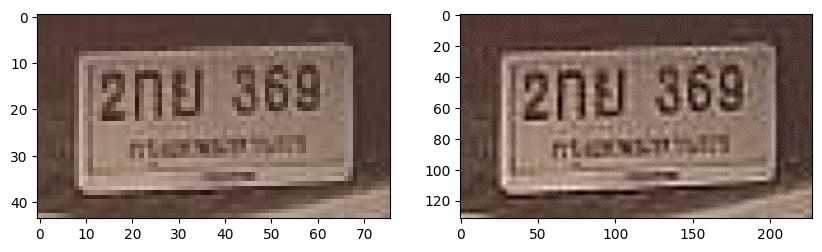

In [142]:
img = cv2.imread("/content/test/test/954b59dc-b324-4099-9f31-a6bb0e60fd8f.jpg")
id = 7
img_name = test_df.iloc[id].values[0]
print(img_name)
x1 = int(test_df.iloc[id].values[1])-8
y1 = int(test_df.iloc[id].values[2])-8
x2 = int(test_df.iloc[id].values[3])+8
y2 = int(test_df.iloc[id].values[4])+8
print(f"{img_name} {x1} {y1} {x2} {y2}")
imgcroped = img[y1:y2,x1:x2]

# Scale the image by a factor of 2 along both axes
scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
# Remove noise using a Gaussian filter
filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
# Create the sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(imgcroped)
plt.subplot(122)
plt.imshow(sharpened_image)

results  = model(source = sharpened_image,
                     conf=0.08)   # Predict image by image
for result in results:
    if result.boxes:
        boxes  = result.boxes.xywh.tolist()    # Tensor ‡∏á‡∏á‡πÜ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
        clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
        bc = {}
        for b,c in zip(boxes,clases):     # keep class and box postion in {}
            bc[c] = b[0]
        sbc = {k:v for k,v in sorted(bc.items(),key=lambda item: item[1])}      # Get position with class then sorted it!!!
        lsbc = list(sbc.keys())
        print(lsbc)
        result = convert2label(lsbc)
        print(result)

In [115]:
lsbc

[10, 41, 18, 77, 62, 9, 6, 1]

In [128]:
def convert2label(lsbc):
    for i in lsbc:
        if i in junwat.keys():
            if i == 54:       # ‡∏ñ‡πâ‡∏≤‡πÄ‡∏à‡∏≠‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û
                label = '0'
                break
            else:             # ‡∏ï‡πà‡∏≤‡∏á‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î
                label = '1'
        else:                 # ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡πÉ‡∏ô‡∏Ñ‡∏µ‡∏¢‡πå ‡∏à‡∏±‡∏á‡∏´‡∏ß‡∏±‡∏î
            label = '1'
    for j in lsbc:
        if j in thaichar.keys():
            label = label + thaichar[j]
    return label
convert2label(lsbc)


'1‡∏Å‡∏†‡∏â961'

In [74]:
list(sbc.keys())

[15, 0, 54, 6, 7, 4]

In [109]:
sbc = {k:v for k,v in sorted(bc.items(),key=lambda item: item[1])}
lsbc = list(sbc.keys())
result = convert2label(lsbc)
result

'0‡∏Å‡∏†‡∏â961'

In [58]:
boxes

[[139.3094024658203, 61.670860290527344, 28.42120361328125, 56.45167922973633],
 [158.67999267578125,
  62.886573791503906,
  23.816604614257812,
  53.18618392944336],
 [84.4483642578125, 63.55119323730469, 36.93730926513672, 56.71628952026367],
 [180.1768798828125, 57.51694869995117, 32.92607116699219, 67.66297149658203],
 [130.565673828125, 98.2244873046875, 137.14797973632812, 36.863616943359375],
 [118.29856872558594,
  60.747459411621094,
  29.853858947753906,
  55.800960540771484]]

In [98]:
print(lsbc)
convert2label(lsbc)

[4, 10, 41, 54, 5]


'04‡∏Å‡∏†5'

In [122]:
thaichar = {0: '0',1: '1',2: '2',3: '3',4: '4',5: '5',6: '6',7: '7',8: '8',9: '9',10: '‡∏Å',11: '‡∏Ç',12: '‡∏É',13: '‡∏Ñ',14: '‡∏Ö',15: '‡∏Ü',16: '‡∏á',17: '‡∏à',18: '‡∏â',19: '‡∏ä',20: '‡∏ã',21: '‡∏å',22: '‡∏ç',23: '‡∏é',24: '‡∏è',25: '‡∏ê',26: '‡∏ë',27: '‡∏í',28: '‡∏ì',29: '‡∏î',30: '‡∏ï',31: '‡∏ñ',32: '‡∏ó',33: '‡∏ò',34: '‡∏ô',35: '‡∏ö',36: '‡∏õ',37: '‡∏ú',38: '‡∏ù',39: '‡∏û',40: '‡∏ü',41: '‡∏†',42: '‡∏°',43: '‡∏¢',44: '‡∏£',45: '‡∏•',46: '‡∏ß',47: '‡∏®',48: '‡∏©',49: '‡∏™',50: '‡∏´',51: '‡∏¨',52: '‡∏≠',53: '‡∏Æ'}
junwat = {54: '‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£',55: '‡∏Å‡∏£‡∏∞‡∏ö‡∏µ‡πà',56: '‡∏Å‡∏≤‡∏ç‡∏à‡∏ô‡∏ö‡∏∏‡∏£‡∏µ',57: '‡∏Å‡∏≤‡∏¨‡∏™‡∏¥‡∏ô‡∏ò‡∏∏‡πå',58: '‡∏Å‡∏≥‡πÅ‡∏û‡∏á‡πÄ‡∏û‡∏ä‡∏£',59: '‡∏Ç‡∏≠‡∏ô‡πÅ‡∏Å‡πà‡∏ô',60: '‡∏à‡∏±‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ',61: '‡∏â‡∏∞‡πÄ‡∏ä‡∏¥‡∏á‡πÄ‡∏ó‡∏£‡∏≤',62: '‡∏ä‡∏•‡∏ö‡∏∏‡∏£‡∏µ',63: '‡∏ä‡∏±‡∏¢‡∏ô‡∏≤‡∏ó',64: '‡∏ä‡∏±‡∏¢‡∏†‡∏π‡∏°‡∏¥',65: '‡∏ä‡∏∏‡∏°‡∏û‡∏£',66: '‡πÄ‡∏ä‡∏µ‡∏¢‡∏á‡∏£‡∏≤‡∏¢',67: '‡πÄ‡∏ä‡∏µ‡∏¢‡∏á‡πÉ‡∏´‡∏°‡πà',68: '‡∏ï‡∏£‡∏±‡∏á',69: '‡∏ï‡∏£‡∏≤‡∏î',70: '‡∏ï‡∏≤‡∏Å',71: '‡∏ô‡∏Ñ‡∏£‡∏ô‡∏≤‡∏¢‡∏Å',72: '‡∏ô‡∏Ñ‡∏£‡∏õ‡∏ê‡∏°',73: '‡∏ô‡∏Ñ‡∏£‡∏û‡∏ô‡∏°',74: '‡∏ô‡∏Ñ‡∏£‡∏£‡∏≤‡∏ä‡∏™‡∏µ‡∏°‡∏≤',75: '‡∏ô‡∏Ñ‡∏£‡∏®‡∏£‡∏µ‡∏ò‡∏£‡∏£‡∏°‡∏£‡∏≤‡∏ä',76: '‡∏ô‡∏Ñ‡∏£‡∏™‡∏ß‡∏£‡∏£‡∏Ñ‡πå',77: '‡∏ô‡∏ô‡∏ó‡∏ö‡∏∏‡∏£‡∏µ',78: '‡∏ô‡∏£‡∏≤‡∏ò‡∏¥‡∏ß‡∏≤‡∏™',79: '‡∏ô‡πà‡∏≤‡∏ô',80: '‡∏ö‡∏∂‡∏á‡∏Å‡∏≤‡∏¨',81: '‡∏ö‡∏∏‡∏£‡∏µ‡∏£‡∏±‡∏°‡∏¢‡πå',82: '‡∏õ‡∏ó‡∏∏‡∏°‡∏ò‡∏≤‡∏ô‡∏µ',83: '‡∏õ‡∏£‡∏∞‡∏à‡∏ß‡∏ö‡∏Ñ‡∏µ‡∏£‡∏µ‡∏Ç‡∏±‡∏ô‡∏ò‡πå',84: '‡∏õ‡∏£‡∏≤‡∏à‡∏µ‡∏ô‡∏ö‡∏∏‡∏£‡∏µ',85: '‡∏õ‡∏±‡∏ï‡∏ï‡∏≤‡∏ô‡∏µ',86: '‡∏û‡∏£‡∏∞‡∏ô‡∏Ñ‡∏£‡∏®‡∏£‡∏µ‡∏≠‡∏¢‡∏∏‡∏ò‡∏¢‡∏≤',87: '‡∏û‡∏±‡∏á‡∏á‡∏≤',88: '‡∏û‡∏±‡∏ó‡∏•‡∏∏‡∏á',89: '‡∏û‡∏¥‡∏à‡∏¥‡∏ï‡∏£',90: '‡∏û‡∏¥‡∏©‡∏ì‡∏∏‡πÇ‡∏•‡∏Å',91: '‡πÄ‡∏û‡∏ä‡∏£‡∏ö‡∏∏‡∏£‡∏µ',92: '‡πÄ‡∏û‡∏ä‡∏£‡∏ö‡∏π‡∏£‡∏ì‡πå',93: '‡πÅ‡∏û‡∏£‡πà',94: '‡∏û‡∏∞‡πÄ‡∏¢‡∏≤',95: '‡∏†‡∏π‡πÄ‡∏Å‡πá‡∏ï',96: '‡∏°‡∏´‡∏≤‡∏™‡∏≤‡∏£‡∏Ñ‡∏≤‡∏°',97: '‡∏°‡∏∏‡∏Å‡∏î‡∏≤‡∏´‡∏≤‡∏£',98: '‡πÅ‡∏°‡πà‡∏Æ‡πà‡∏≠‡∏á‡∏™‡∏≠‡∏ô',99: '‡∏¢‡∏∞‡∏•‡∏≤',100: '‡∏¢‡πÇ‡∏™‡∏ò‡∏£',101: '‡∏£‡πâ‡∏≠‡∏¢‡πÄ‡∏≠‡πá‡∏î',102: '‡∏£‡∏∞‡∏ô‡∏≠‡∏á',103: '‡∏£‡∏∞‡∏¢‡∏≠‡∏á',104: '‡∏£‡∏≤‡∏ä‡∏ö‡∏∏‡∏£‡∏µ',105: '‡∏•‡∏û‡∏ö‡∏∏‡∏£‡∏µ',106: '‡∏•‡∏≥‡∏õ‡∏≤‡∏á',107: '‡∏•‡∏≥‡∏û‡∏π‡∏ô',108: '‡πÄ‡∏•‡∏¢',109: '‡∏®‡∏£‡∏µ‡∏™‡∏∞‡πÄ‡∏Å‡∏©',110: '‡∏™‡∏Å‡∏•‡∏ô‡∏Ñ‡∏£',111: '‡∏™‡∏á‡∏Ç‡∏•‡∏≤',112: '‡∏™‡∏ï‡∏π‡∏•',113: '‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏õ‡∏£‡∏≤‡∏Å‡∏≤‡∏£',114: '‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏™‡∏á‡∏Ñ‡∏£‡∏≤‡∏°',115: '‡∏™‡∏°‡∏∏‡∏ó‡∏£‡∏™‡∏≤‡∏Ñ‡∏£',116: '‡∏™‡∏£‡∏∞‡πÅ‡∏Å‡πâ‡∏ß',117: '‡∏™‡∏£‡∏∞‡∏ö‡∏∏‡∏£‡∏µ',118: '‡∏™‡∏¥‡∏á‡∏´‡πå‡∏ö‡∏∏‡∏£‡∏µ',119: '‡∏™‡∏∏‡πÇ‡∏Ç‡∏ó‡∏±‡∏¢',120: '‡∏™‡∏∏‡∏û‡∏£‡∏£‡∏ì‡∏ö‡∏∏‡∏£‡∏µ',121: '‡∏™‡∏∏‡∏£‡∏≤‡∏©‡∏é‡∏£‡πå‡∏ò‡∏≤‡∏ô‡∏µ',122: '‡∏™‡∏∏‡∏£‡∏¥‡∏ô‡∏ó‡∏£‡πå',123: '‡∏´‡∏ô‡∏≠‡∏á‡∏Ñ‡∏≤‡∏¢',124: '‡∏´‡∏ô‡∏≠‡∏á‡∏ö‡∏±‡∏ß‡∏•‡∏≥‡∏†‡∏π',125: '‡∏≠‡πà‡∏≤‡∏á‡∏ó‡∏≠‡∏á',126: '‡∏≠‡∏∏‡∏î‡∏£‡∏ò‡∏≤‡∏ô‡∏µ',127: '‡∏≠‡∏∏‡∏ó‡∏±‡∏¢‡∏ò‡∏≤‡∏ô‡∏µ',128: '‡∏≠‡∏∏‡∏ï‡∏£‡∏î‡∏¥‡∏ï‡∏ñ‡πå',129: '‡∏≠‡∏∏‡∏ö‡∏•‡∏£‡∏≤‡∏ä‡∏ò‡∏≤‡∏ô‡∏µ',130: '‡∏≠‡∏≥‡∏ô‡∏≤‡∏à‡πÄ‡∏à‡∏£‡∏¥‡∏ç'}
# clases = [7, 54]
def convert2label(clases):
    for i in clases:
        if i in junwat.keys():
            if i == 54:
                label = '0'
            else:
                label = '1'
        else:
            label = '0'
    for j in clases:
        if j in thaichar.keys():
            label = label+thaichar[j]
    return label

In [113]:
for i in lsbc:
    print(i)

10
41
18
77
62
9
6
1


In [138]:
df

image_id     label
0     4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4   0‡∏¨-0674
1     2678e665-50a9-42eb-8b98-3a1323a8950d  05‡∏Å‡∏í4901
2     1b3bee82-898d-4aa8-9a7e-6f375ad62d8f   1‡∏Å‡∏â9661
3     6d997bce-395e-4d25-85e4-dec70ead7954       NaN
4     59c765b1-cdac-4fa7-902c-685f1591decf       NaN
...                                    ...       ...
1695  1c766e55-3096-4814-8c23-7cb8facc0e36       NaN
1696  98e8495a-e51d-494f-951d-739a93d87777       NaN
1697  935248b8-1fe9-4cc3-8894-007bd715d309       NaN
1698  df48b54b-8e63-4484-85f1-99a6c97e92f4       NaN
1699  0935be77-b0e7-4c90-8a42-9b03d3ad0a66       NaN

[1700 rows x 2 columns]

In [152]:
df = pd.read_csv("/content/submission.csv")
broken = []
for idx,row in df[:].iterrows():
    # print(idx,"->",row)
    if pd.isna(row['label'])==False:
        continue
    img_file = str(row['image_id'])
    id = idx
    # print(idx,img_file)
    img_path = f'{img_dir}/{img_file}.jpg'

    img = cv2.imread(img_path)
    img_name = test_df.iloc[id].values[0]      # query data
    # print(img_name)
    x1 = int(test_df.iloc[id].values[1])-10    # add bound
    y1 = int(test_df.iloc[id].values[2])-10    # add bound
    x2 = int(test_df.iloc[id].values[3])+10    # add bound
    y2 = int(test_df.iloc[id].values[4])+10    # add bound
    # print(f"{img_name} {x1} {y1} {x2} {y2}")
    imgcroped = img[y1:y2,x1:x2]
    scaled_image = cv2.resize(imgcroped, None, fx=3, fy=3)
    # Remove noise using a Gaussian filter
    filtered_image2 = cv2.GaussianBlur(scaled_image, (5,5), 0)
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
    # Sharpen the image
    sharpened_image = cv2.filter2D(filtered_image2, -1, kernel)
    sharpened_image = cv2.filter2D(sharpened_image, -1, kernel)
    # plt.imshow(imgcroped)
    # plt.show()
    results  = model(source = sharpened_image,
                        conf=0.09)   # Predict image by image
    for result in results:
        if result.boxes:
            boxes  = result.boxes.xyxy.tolist()    # Tensor ‡∏á‡∏á‡πÜ -> [[x1,y1,z1,a1],[x2,y2,z2,a2],...[xn,yn,zn,an]]
            clases = [int(cls) for cls in result.boxes.cls.tolist()]    # [float] -> [int]
            bc = {}
            for b,c in zip(boxes,clases):     # keep class and box postion in {}
                bc[c] = b[0]
            sbc = {k:v for k,v in sorted(bc.items(),key=lambda item: item[1])}      # Get position with class then sorted it!!!
            lsbc = list(sbc.keys())
            # print(lsbc)
            result = convert2label(lsbc)
            df.at[idx,'label'] = result
        else:
            df.at[idx,'label'] = ''
            broken.append(idx)

Streaming output truncated to the last 5000 lines.
0: 384x640 1 6, 2 7s, 1 8, 2 9s, 1 ‡∏Å, 1 ‡∏ó, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 21.6ms
Speed: 2.5ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 2 4s, 1 5, 1 6, 1 ‡∏Å, 1 ‡∏©, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 23.8ms
Speed: 1.9ms preprocess, 23.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 4s, 1 7, 1 9, 1 ‡∏é, 1 ‡∏è, 2 ‡∏†s, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 21.5ms
Speed: 2.8ms preprocess, 21.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 1, 1 5, 2 6s, 1 ‡∏Å, 1 ‡∏â, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 21.2ms
Speed: 2.6ms preprocess, 21.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 0s, 1 1, 1 2, 1 5, 2 7s, 1 ‡∏Å, 1 ‡∏†, 2 ‡∏ßs, 1 ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, 28.0ms
Speed: 2.1ms preprocess, 28.0ms inference, 1.8ms postproc

In [153]:
broken

[414, 528, 777, 1205, 1318]

In [154]:
df

image_id     label
0     4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4   0‡∏¨-0674
1     2678e665-50a9-42eb-8b98-3a1323a8950d  05‡∏Å‡∏í4901
2     1b3bee82-898d-4aa8-9a7e-6f375ad62d8f   1‡∏Å‡∏â9661
3     6d997bce-395e-4d25-85e4-dec70ead7954     0‡∏à‡∏´64
4     59c765b1-cdac-4fa7-902c-685f1591decf   0‡∏å‡∏ò5479
...                                    ...       ...
1695  1c766e55-3096-4814-8c23-7cb8facc0e36    0‡∏Å1467
1696  98e8495a-e51d-494f-951d-739a93d87777     0‡∏´‡∏£67
1697  935248b8-1fe9-4cc3-8894-007bd715d309   02‡∏Å6970
1698  df48b54b-8e63-4484-85f1-99a6c97e92f4     0‡∏Å‡∏†45
1699  0935be77-b0e7-4c90-8a42-9b03d3ad0a66  02‡∏í‡∏ñ3594

[1700 rows x 2 columns]

In [155]:
import time
version = "0.2.0"
# Format the time as hh:mm
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
df.to_csv(csv_name,index=False)

v.0.2.0.1242.csv
